In [1]:
import keras

2022-11-19 17:45:51.623111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 17:45:51.761246: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-19 17:45:52.462860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/quakumei/.conda/envs/py39/lib/
2022-11-19 17:45:52.463249: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugi

In [30]:
def gen_model():
    input1 = keras.layers.Input(shape=(10,))
    input2 = keras.layers.Input(shape=(10,))

    out1 = keras.layers.Dense(1)(input1)
    out1 = keras.layers.Dropout(0.5)(out1)

    out2 = keras.layers.Dense(1)(input2)
    out2 = keras.layers.Dropout(0.5)(out2)


    out = keras.layers.concatenate([out1, out2])

    out = keras.layers.Dense(5)(out)
    out = keras.layers.Dropout(0.5)(out)

    out = keras.layers.Dense(1)(out)


    model = keras.models.Model([input1,input2], out)
    model.compile(optimizer='sgd', loss='mse')

    return model


In [33]:
model = gen_model()
print(f"Model(): {model.input_shape} -> {model.output_shape}")

Model(): [(None, 10), (None, 10)] -> (None, 1)


In [34]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 dense_18 (Dense)               (None, 1)            11          ['input_12[0][0]']               
                                                                                                  
 dense_19 (Dense)               (None, 1)            11          ['input_13[0][0]']               
                                                                                            

In [35]:
# %pip install pydot graphviz

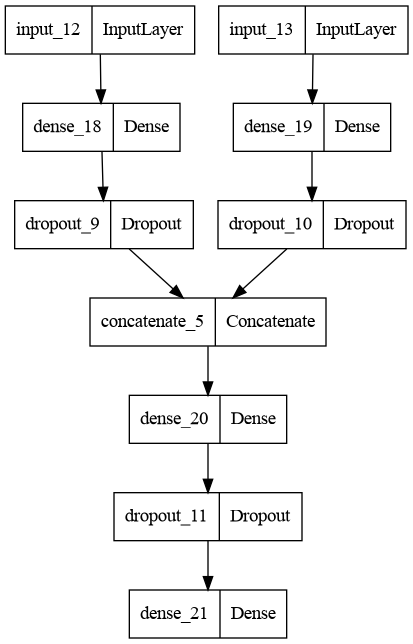

In [36]:
keras.utils.plot_model(model, "my_first_model.png")

In [41]:
import numpy as np
history = model.fit([np.random.rand(100,10), np.random.rand(100,10)], np.random.rand(100,1), epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1031
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1013
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1126
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1131
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1084
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1026
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1066
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1056
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1079
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1076


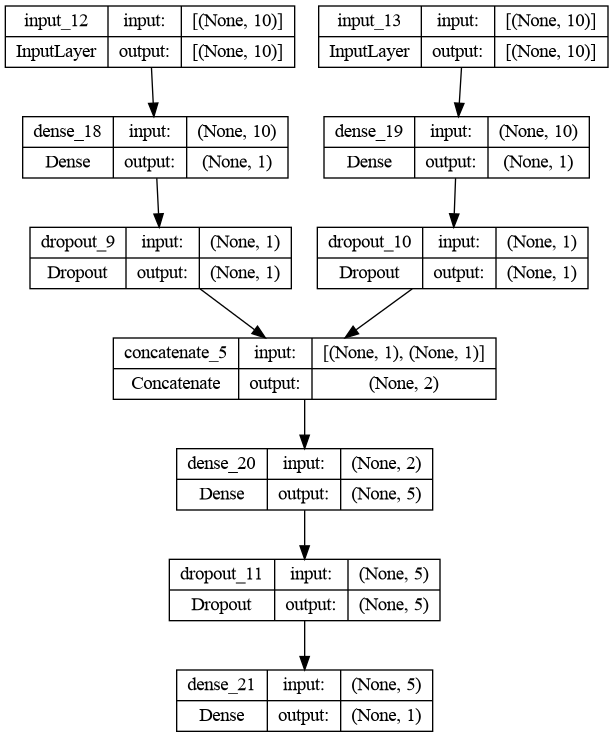

In [42]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)